In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
filename='UrbanSound8K/gun-shot.wav'

In [28]:
import IPython.display as ipd
import librosa
import librosa.display

In [29]:
!dir

 Volume in drive C is Windows-SSD
 Volume Serial Number is 5022-C19E

 Directory of C:\MBA\Portfolio Projects\Data Science learning\Audio Classification

2025-09-24  07:09 PM    <DIR>          .
2025-09-24  05:55 PM    <DIR>          ..
2025-09-24  05:02 PM    <DIR>          .ipynb_checkpoints
2025-09-24  07:09 PM         1,033,217 Audio Classification EDA.ipynb
2025-09-24  06:45 PM    <DIR>          saved_models
2025-09-24  06:50 PM    <DIR>          UrbanSound8K
               1 File(s)      1,033,217 bytes
               5 Dir(s)  11,997,696,000 bytes free


In [30]:
librosa.__version__

'0.10.1'

In [31]:
import librosa, matplotlib
print("Librosa version:", librosa.__version__)
print("Matplotlib version:", matplotlib.__version__)

Librosa version: 0.10.1
Matplotlib version: 3.8.0


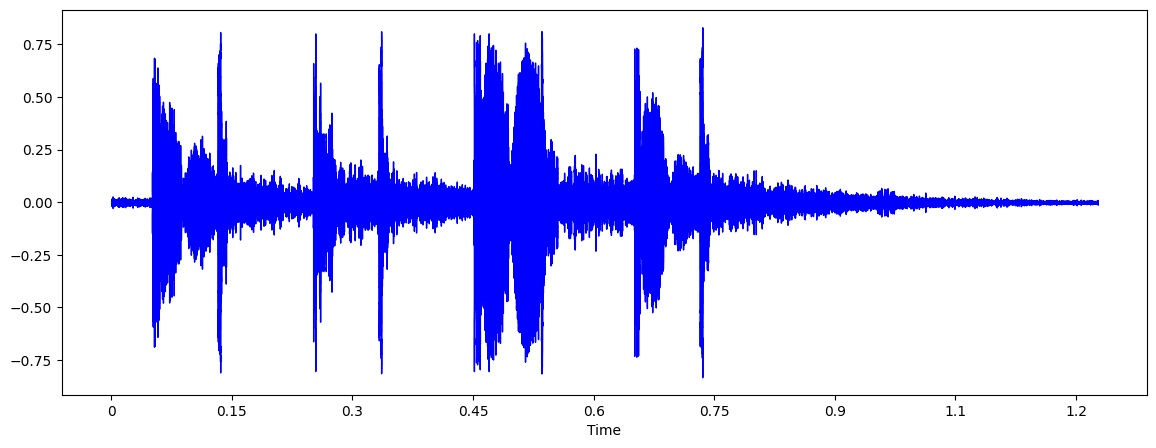

In [32]:
### Gun shot Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate, color="b")
ipd.Audio(filename)

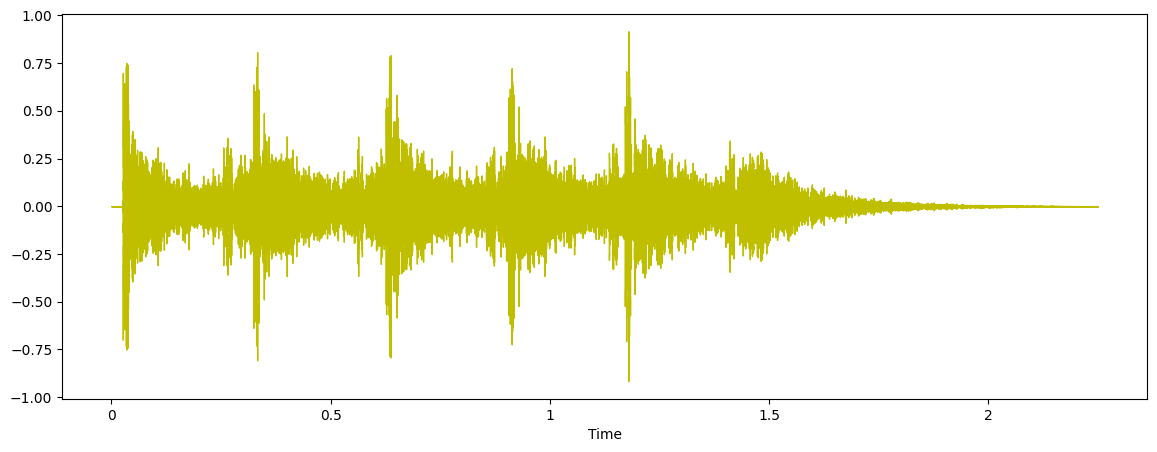

In [33]:
### Sound
filename='UrbanSound8K/7061-6-0-0.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate, color="y")
ipd.Audio(filename)

In [34]:
sample_rate

22050

In [35]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [36]:
wave_sample_rate

44100

In [37]:
wave_audio

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [1, 0],
       [1, 1],
       [0, 0]], dtype=int16)

In [38]:
import pandas as pd

metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [39]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

## Audio Classification Data Preprocessing

In [40]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='UrbanSound8K/7061-6-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [41]:
print(librosa_audio_data)

[-7.4505806e-09  2.9802322e-08  4.8428774e-08 ...  1.0127544e-05
  2.3271263e-05  7.0009992e-06]


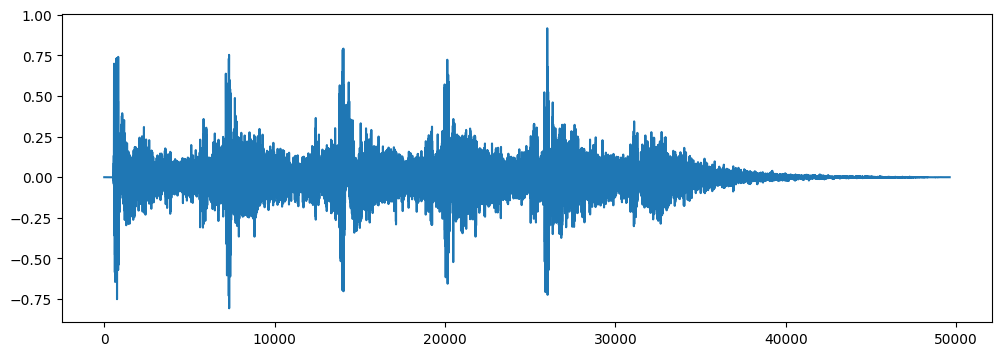

In [42]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [43]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [44]:
wave_audio

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [1, 0],
       [1, 1],
       [0, 0]], dtype=int16)

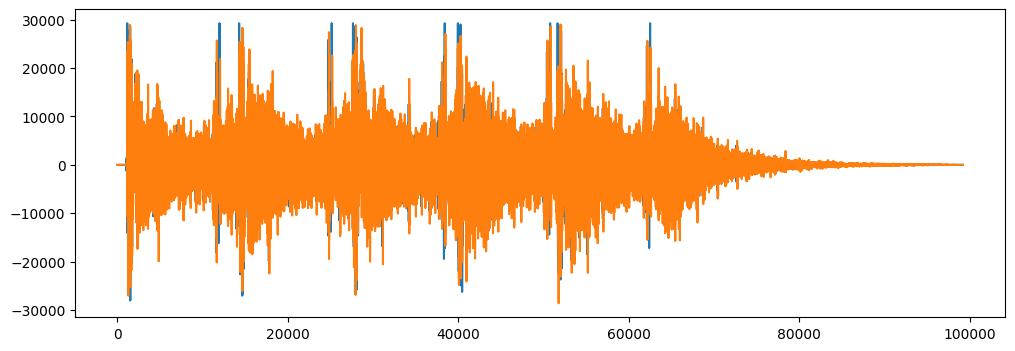

In [45]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [46]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 97)


In [47]:
mfccs

array([[-1.2721312e+02,  8.0479240e+00,  1.6004412e+01, ...,
        -5.6935333e+02, -5.9172754e+02, -6.1065784e+02],
       [ 3.0020668e+01,  2.2940346e+01,  1.0669682e+01, ...,
         4.3051193e+01,  2.5888042e+01,  1.2829786e+01],
       [-2.5360160e+00, -1.1252434e+01, -1.4259803e+01, ...,
        -1.1103722e+01, -7.5506268e+00,  2.0151618e-01],
       ...,
       [ 3.2335949e-01, -3.5481033e+00, -5.0293422e+00, ...,
         2.4095781e+00,  3.1699724e+00, -2.1270427e-01],
       [-9.7800560e+00, -9.0905132e+00, -6.1912651e+00, ...,
        -5.0198972e-02,  7.2895074e-01, -9.0055245e-01],
       [ 1.6566069e+00,  1.8223336e+00,  2.8306220e+00, ...,
        -2.0609212e+00, -2.2312660e+00, -1.7745861e+00]], dtype=float32)

In [48]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [49]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [50]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [04:40, 13.34it/s]C:\Users\manpr\anaconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [10:35, 18.63it/s]C:\Users\manpr\anaconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\manpr\anaconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [11:02, 13.18it/s]


In [51]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [52]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [53]:
X.shape

(8732, 40)

In [55]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [56]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [57]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [58]:
print("Classes:", labelencoder.classes_) 

Classes: ['air_conditioner' 'car_horn' 'children_playing' 'dog_bark' 'drilling'
 'engine_idling' 'gun_shot' 'jackhammer' 'siren' 'street_music']


In [59]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [60]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665213e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305033e+00, -5.27745295e+00, -1.55697179e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641211e-01,  7.33490884e-01,  7.11009145e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [61]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [62]:
X_train.shape

(6985, 40)

In [63]:
X_test.shape

(1747, 40)

In [64]:
y_train.shape

(6985, 10)

In [65]:
y_test.shape

(1747, 10)

## Model Creation

In [66]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [68]:
### No of classes
num_labels=y.shape[1]
num_labels

10

In [69]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

C:\Users\manpr\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [115]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
216/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6596 - loss: 0.9958
Epoch 1: val_loss improved from None to 0.81279, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6654 - loss: 1.0025 - val_accuracy: 0.7516 - val_loss: 0.8128
Epoch 2/100
202/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6673 - loss: 1.0194
Epoch 2: val_loss did not improve from 0.81279
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6674 - loss: 1.0033 - val_accuracy: 0.7487 - val_loss: 0.8234
Epoch 3/100
214/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6710 - loss: 0.9727
Epoch 3: val_loss did not improve from 0.81279
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6686 - loss: 1.0022 - val_accuracy: 0.7436 - val_loss: 0.8258
Epoch 4/100
209/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6815 - loss: 0.9853
Epoch 4: val_loss did not improve from 0.81279
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.

In [116]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7876359224319458


In [117]:
X_test[1]

array([-466.17957   ,    1.0950246 ,  -34.01389   ,   35.339348  ,
        -14.88148   ,  -19.12843   ,   -0.5816844 ,  -16.130579  ,
        -21.339073  ,    7.6736345 ,  -29.164494  ,  -18.950253  ,
         -2.9579995 ,   -8.16233   ,  -15.153101  ,   -6.6048055 ,
         -7.568598  ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340123 ,  -19.228804  ,   -4.6302314 ,
         -1.0564744 ,    3.215267  ,   -6.984281  ,  -16.414577  ,
        -10.0286455 ,   13.009955  ,    0.53346086,  -23.84339   ,
        -15.267321  ,    9.245734  ,   10.367627  ,   -0.5832012 ,
         -1.2624055 ,   17.700018  ,   13.847463  ,   -5.1862826 ],
      dtype=float32)

In [118]:
pred_probs = model.predict(X_test)[0]
pred_probs

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([1.9604390e-04, 1.9415574e-04, 4.5196520e-04, 8.7729037e-05,
       2.3753595e-04, 9.9237728e-01, 3.6144667e-07, 3.6949831e-07,
       4.2219570e-05, 6.4123054e-03], dtype=float32)

In [119]:
pred_class = np.argmax(pred_probs)
pred_class

5

In [120]:
prediction_label = labelencoder.inverse_transform([pred_class]) 
prediction_label

array(['engine_idling'], dtype='<U16')

## Testing Some Test Audio Data
#### Steps

* Preprocess the new audio data
* predict the classes
* Invere transform your Predicted Label

In [129]:
filename="UrbanSound8K/4912-3-3-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

[-2.32878891e+02  1.67939697e+02 -2.08509827e+01 -1.52964983e+01
 -1.86269493e+01  8.75057125e+00 -3.47316289e+00  6.50742197e+00
 -1.86994476e+01  6.93179274e+00 -2.30707812e+00  2.07070541e+01
 -4.22550440e+00  1.49399185e+01  1.39178085e+01  8.98531532e+00
 -4.96458483e+00  1.20173559e+01 -4.52292395e+00  2.39990687e+00
 -2.49733305e+00 -3.05758572e+00 -4.83214712e+00  6.59291840e+00
  9.30030823e-01  7.50665724e-01  1.23783790e-01 -4.18802357e+00
 -5.62062204e-01 -5.20797634e+00 -3.85188675e+00 -3.33118439e+00
 -1.73100874e-01  4.45014238e+00  5.99296904e+00  2.18026444e-01
  2.32480264e+00 -4.44202518e+00 -5.54501009e+00 -4.44005203e+00]
[[-2.32878891e+02  1.67939697e+02 -2.08509827e+01 -1.52964983e+01
  -1.86269493e+01  8.75057125e+00 -3.47316289e+00  6.50742197e+00
  -1.86994476e+01  6.93179274e+00 -2.30707812e+00  2.07070541e+01
  -4.22550440e+00  1.49399185e+01  1.39178085e+01  8.98531532e+00
  -4.96458483e+00  1.20173559e+01 -4.52292395e+00  2.39990687e+00
  -2.49733305e+00 -

In [130]:
predicted_label_probs=model.predict(mfccs_scaled_features)
print(predicted_label_probs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[6.0901855e-04 9.2738651e-04 5.5987802e-03 8.8155562e-01 3.6207479e-03
  2.1512760e-03 5.8606885e-02 6.6635920e-08 5.4260171e-03 4.1504264e-02]]


In [131]:
predicted_label = np.argmax(predicted_label_probs)
predicted_label

3

In [132]:
prediction_class = labelencoder.inverse_transform([predicted_label])
prediction_class

array(['dog_bark'], dtype='<U16')